## K-means Clustering
#### Author: Uday Keith
#### Date: May 18, 2018

In [5]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

## Implementing K-means clustering via Oops

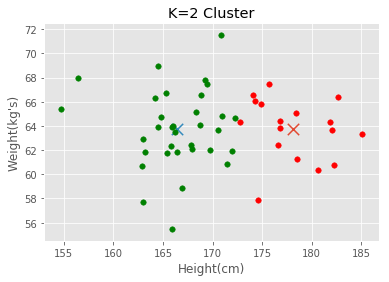

In [7]:
# Declare K-means class

style.use('ggplot')

# tolerance refers to threshold to limit convergece 
class K_Means:
    def __init__(self, k=2, tolerance = 0.01, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

        
        #find the euclidean distance between the point and cluster centroid; choose the nearest centroid
        # for every row vector, calculate the distance b/w itself and each cluster
        # choose the smallest distance
        # use the index position of min. distance to select which list in classes dict to add to
        # where each list holds the data points associated with the Kth cluster
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)
            
            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
        
        #Flag that will allow us to break code if minimum within-cluster tolernace achieved 
            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        print(classification)
        return classification

def main():
    X = df.values #returns a numpy array
    
    km = K_Means(2)
    km.fit(X)
    
    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)
    plt.title("K=2 Cluster")
    plt.xlabel("Height(cm)")
    plt.ylabel("Weight(kg's)")
    plt.show()

# Set seed to random data is reproduciblbe
np.random.seed(1)
    # height in cm
x1 = 6.9 * np.random.randn(50) + 170.6
    # weight in kg's
x2 = 3.8 * np.random.randn(50) + 63.2
df1 = pd.DataFrame(x1)
df2 = pd.DataFrame(x2)
df = pd.concat([df1,df2],axis =1)

   

if __name__ == "__main__":
    main()



## K-means using Sklearn 

In [8]:

np.random.seed(1)
    # height in cm
x1 = 6.9 * np.random.randn(50) + 170.6
    # weight in kg's
x2 = 3.8 * np.random.randn(50) + 63.2
df1 = pd.DataFrame(x1)
df2 = pd.DataFrame(x2)
df = pd.concat([df1,df2],axis =1)
X = df.values

kmeans = KMeans(n_clusters=2,tol = 0.001).fit(X)

In [9]:
kmeans.labels_

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1], dtype=int32)

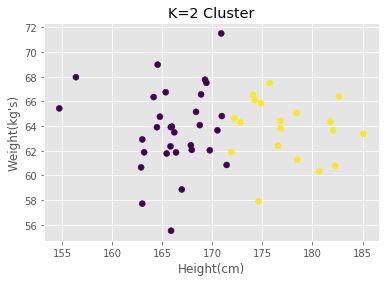

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_.astype(float))
plt.title("K=2 Cluster")
plt.xlabel("Height(cm)")
plt.ylabel("Weight(kg's)")
plt.show()

In [11]:
## Scaling

In [12]:
from sklearn.preprocessing import scale 

#subtract by mean and divide by sample standard deviation; Z axis
X_scaled = scale(X)



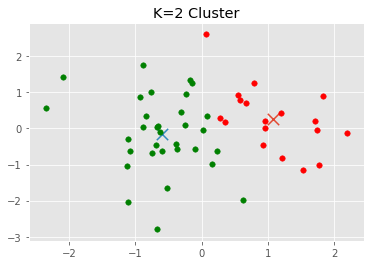

In [13]:
def main():
    #np.random.seed(1)
    #x1 = np.random.randn(50)
    #x2 = np.random.randn(50)
    #df1 = pd.DataFrame(x1)
    #df2 = pd.DataFrame(x2)
    #df = pd.concat([df1,df2],axis =1)

    #X = df.values #returns a numpy array
    
    km = K_Means(2)
    km.fit(X_scaled)
    
    # Plotting starts here
    colors = 10*["r", "g", "c", "b", "k"]

    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)
    plt.title("K=2 Cluster")
    plt.show()
    
    

if __name__ == "__main__":
    main()



## BUT...how do we choose K, the number of clusters?? 

Well, one way is just to eye-ball the clustering and if historical data or domain knowledge present, compare against the distribution. Not a great approach. 




### Elbow Method

In the elbow method, we choose the number of K based on the elbow of the cost function vs K plot. Elbow implies the point post which the change in  magnitute of cost reduction stops increasing (or starts decreasing) as K increases. 

In [14]:
# k means determine k

distortions = []
K = range(2,10)
for k in K:
    kmeanModel =KMeans(n_clusters=k)
    kmeanModel.fit(X)
    #cost func; sum of squared distance b/w each row vector and final Kth cluster centroid
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 

In [15]:
distortions

[4.115958990147668,
 3.4413332391951745,
 3.047259230182351,
 2.7399829514617777,
 2.414430782297856,
 2.208905569880674,
 2.054110524447812,
 1.890594689248501]

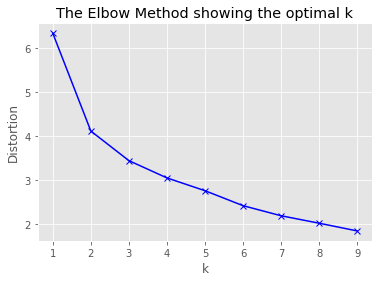

In [159]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [164]:
distortions_scaled = []
K = range(2,9)
for k in K:
    kmeanModel =KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    #cost func; sum of squared distance b/w each row vector and final Kth cluster centroid
    distortions_scaled.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

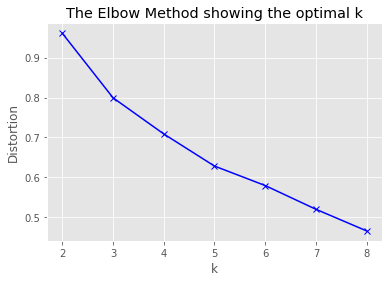

In [165]:
# Plot the elbow
plt.plot(K, distortions_scaled, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



## Sillhouite 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette coefficient displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

The Silhouette Coefficient is calculated using the mean within-cluster distance/variation (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of

There is a visual component to plot the sillhouette's you can follow at: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html



In [120]:


K_vals = [2,3,4,5,6,7,8]
for n_clusters in K_vals:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)



For n_clusters = 2 The average silhouette_score is : 0.3763197783627018
For n_clusters = 3 The average silhouette_score is : 0.3402556773105881
For n_clusters = 4 The average silhouette_score is : 0.3563373928353867
For n_clusters = 5 The average silhouette_score is : 0.38526233414197536
For n_clusters = 6 The average silhouette_score is : 0.3853555034968174
For n_clusters = 7 The average silhouette_score is : 0.3889201598380911
For n_clusters = 8 The average silhouette_score is : 0.3843175019574677
